# Test PGF vs Z - 26Mar - 3Mpc run

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
from matplotlib.pylab import *
rcParams['figure.figsize'] = (12,8)
rcParams['font.size'] = 18
#import logging

In [2]:
import pynbody
import pynbody.plot.sph as sph
import mmap
pynbody.ramses.multiprocess_num = 8
pynbody.config['number_of_threads'] = 64

In [3]:
pynbody.openmp.get_cpus()

16

In [4]:
import matplotlib.pyplot as plt 

In [5]:
s = pynbody.load('output_00056',maxlevel=13)
s['pos']
s['pos'] -= 0.5
s.physical_units();

INFO:pynbody:Loading using backend <class 'pynbody.snapshot.ramses.RamsesSnap'>
INFO:pynbody.snapshot.ramses:Loading hydro files
INFO:pynbody.snapshot.ramses:Done
INFO:pynbody.snapshot.ramses:Loading data from CPU 1
INFO:pynbody.snapshot.ramses:Loading data from CPU 17
INFO:pynbody.snapshot.ramses:Loading data from CPU 33
INFO:pynbody.snapshot.ramses:Loading data from CPU 49
INFO:pynbody.snapshot.ramses:Loading data from CPU 65
INFO:pynbody.snapshot.ramses:Loading data from CPU 81
INFO:pynbody.snapshot.ramses:Loading data from CPU 97
INFO:pynbody.snapshot.ramses:Loading data from CPU 113
INFO:pynbody.snapshot.ramses:Loading data from CPU 2
INFO:pynbody.snapshot.ramses:Loading data from CPU 18
INFO:pynbody.snapshot.ramses:Loading data from CPU 34
INFO:pynbody.snapshot.ramses:Loading data from CPU 50
INFO:pynbody.snapshot.ramses:Loading data from CPU 66
INFO:pynbody.snapshot.ramses:Loading data from CPU 82
INFO:pynbody.snapshot.ramses:Loading data from CPU 98
INFO:pynbody.snapshot.ramses

In [6]:
z = 1/s.properties['a']-1
print "Redshift =",z
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print boxsizestring
print s.properties['a']

Redshift = 16.3629225477
242.91 kpc
0.0575939907151


In [7]:
len(s.g['metal'][s.g['metal']<0.0]),len(s.g['metal'][(s.g['metal']<1e-10) & (s.g['metal']>0.0)])

(6907003, 6886874)

In [8]:
len(s.g['metal'] > 0.0)

183591493

In [9]:
s.g['metal'][s.g['metal']<1e-7] = 0.0
s.g['pzf'][s.g['pzf']<1e-7] = 0.0
s.g['pgf'][s.g['pgf']>(1.0-1e-7)] = 1.0
linex=(1e-7,1)

In [10]:
s.g['metal'][(s.g['metal']<1e-1) & (s.g['metal'] > 0.0)]

SimArray([  1.27946979e-07,   4.56526856e-06,   4.00065308e-06, ...,
         2.91567297e-03,   3.08918005e-03,   2.91731180e-03])

In [14]:
s.g['pgf'][(s.g['pgf']> 1e-7) & (s.g['pgf'] < 1.0)]

SimArray([ 0.99999987,  0.99999296,  0.99999984, ...,  0.83768052,
        0.82788193,  0.83753347])

In [13]:
s.properties['a']

0.0522705962993768

# Plot

### The 54.99 comes from the output and is the slope of (1-P)/Z for those cells in the blast zone.

In [11]:
liney=(1e-7*54.99,54.99) # Y coords of line with slope 12.4514423189731

(1e-07, 1)

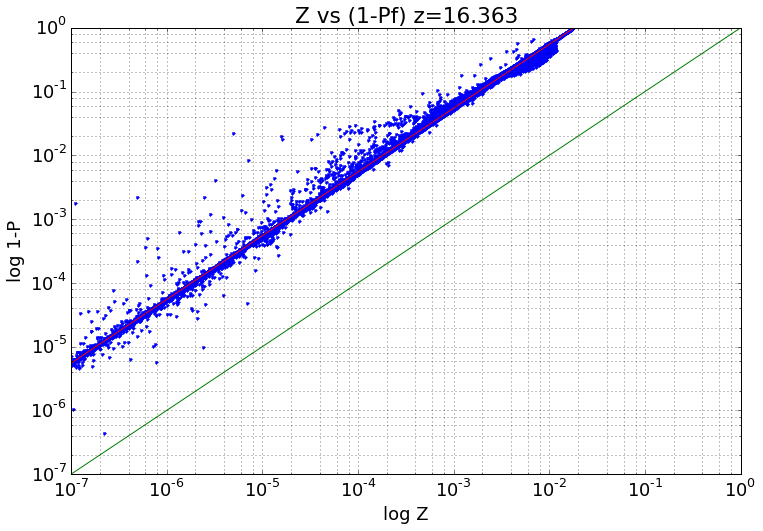

In [12]:
plt.loglog(s.g['metal'],1.0-s.g['pgf'],'.',linex,linex,linex,liney)
plt.title("Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)

### Star forming... 

In [13]:
s.derivable_keys()[1:5]

['mass', 'temp', 'r_mag', 'i_mag']

In [14]:
pynbody.analysis.ramses_util.get_tform(s)

SimArray([ 0.23436784,  0.23483417,  0.22132499,  0.2215069 ,  0.22752757,
        0.22442985,  0.2324467 ,  0.22482556,  0.21795473,  0.22834558,
        0.2229114 ,  0.22019714,  0.22656341,  0.22654515,  0.22105724,
        0.23160315,  0.22952846,  0.22777316,  0.22576598,  0.22535418,
        0.21809774,  0.22123497,  0.2176041 ,  0.22677161,  0.22567604,
        0.22885949,  0.22880265,  0.21746603,  0.21824241,  0.21172607,
        0.21250891,  0.21250891,  0.21256295,  0.21261852,  0.21276443,
        0.21279504,  0.21352205,  0.21389011,  0.21397749,  0.21402211,
        0.21411235,  0.21444692,  0.2145995 ,  0.21465169,  0.21475723,
        0.21486498,  0.21514317,  0.21520056,  0.21537446,  0.21555269,
        0.21561271,  0.21567323,  0.21567323,  0.21573374,  0.21591655,
        0.21616307,  0.21628753,  0.21641289,  0.21647581,  0.21653903,
        0.21653903,  0.21666667,  0.21686163,  0.21692749,  0.21692749,
        0.21699334,  0.21712647,  0.21726108,  0.21739725,  0

/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/plot/stars.py:224: RuntimeWarning: Could not load massform array -- falling back to current stellar masses
  "Could not load massform array -- falling back to current stellar masses", RuntimeWarning)
INFO:pynbody.snapshot:Converting mass units from 5.58e+45 g to Msol
INFO:pynbody.snapshot:Converting mass units from 5.58e+45 g to Msol


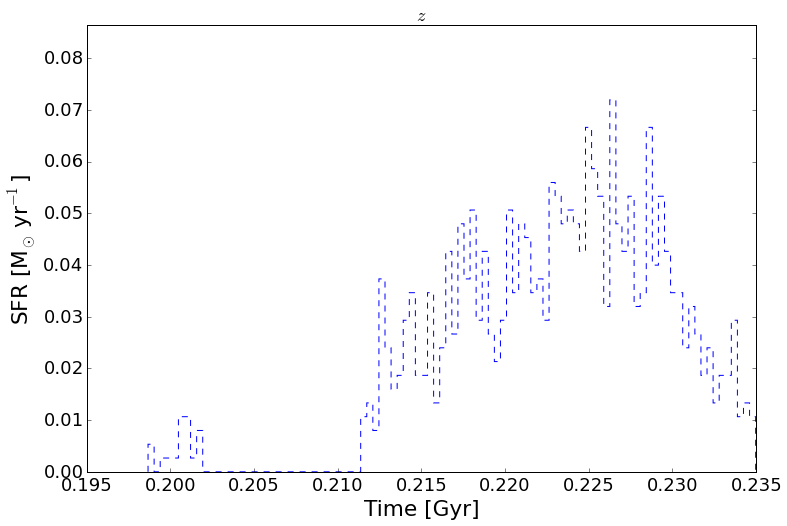

In [17]:
pynbody.plot.stars.sfh(s.s,linestyle='dashed',color='b');

INFO:pynbody.snapshot:Converting mass units from 5.58e+45 g to Msol
INFO:pynbody.snapshot:Converting mass units from 5.58e+45 g to Msol


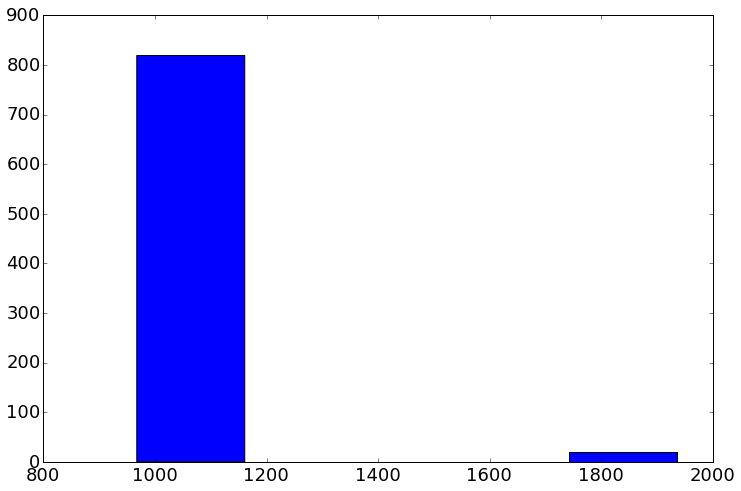

In [15]:
plt.hist(s.s['mass'],bins=5);

In [16]:
starRegion1 = s[pynbody.filt.Cuboid("30 kpc", "16 kpc","110 kpc","53 kpc", "36 kpc", "120 kpc")]
len(starRegion1.s)

435

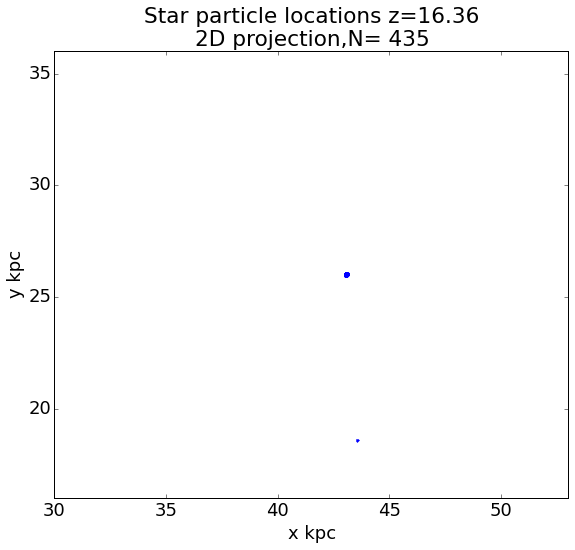

In [23]:
plt.plot(starRegion1.s['x'],starRegion1.s['y'],'.')
plt.xlim((30,53));plt.xlabel("x kpc")
plt.ylim((16,36));plt.ylabel("y kpc")
plt.title("Star particle locations z=%.2f\n2D projection, N= %d"%(z,len(starRegion1.s)))
axes().set_aspect('equal')

In [23]:
boxsizestring

'242.91 kpc'

In [70]:
s.g['metal'][s.g['metal']>0]

SimArray([  7.77929575e-07,   2.07718391e-06,   5.11621820e-05, ...,
         2.21505540e-07,   7.49080155e-05,   6.49409357e-05])

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.snapshot:Deriving array mass
/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/snapshot/__init__.py:1372: RuntimeWarning: Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.
  "Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.", RuntimeWarning)
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


SimArray([[  1.94417454e-17,   1.94417454e-17,   1.94417454e-17, ...,
          1.94417454e-17,   1.94417454e-17,   1.94417454e-17],
       [  1.94417454e-17,   1.94417454e-17,   1.94417454e-17, ...,
          1.94417454e-17,   1.94417454e-17,   1.94417454e-17],
       [  1.94417454e-17,   1.94417454e-17,   1.94417454e-17, ...,
          1.94417454e-17,   1.94417454e-17,   1.94417454e-17],
       ..., 
       [  1.94417454e-17,   1.94417454e-17,   1.94417454e-17, ...,
          1.94417454e-17,   1.94417454e-17,   1.94417454e-17],
       [  1.94417454e-17,   1.94417454e-17,   1.94417454e-17, ...,
          1.94417454e-17,   1.94417454e-17,   1.94417454e-17],
       [  1.94417454e-17,   1.94417454e-17,   1.94417454e-17, ...,
          1.94417454e-17,   1.94417454e-17,   1.94417454e-17]], dtype=float32)

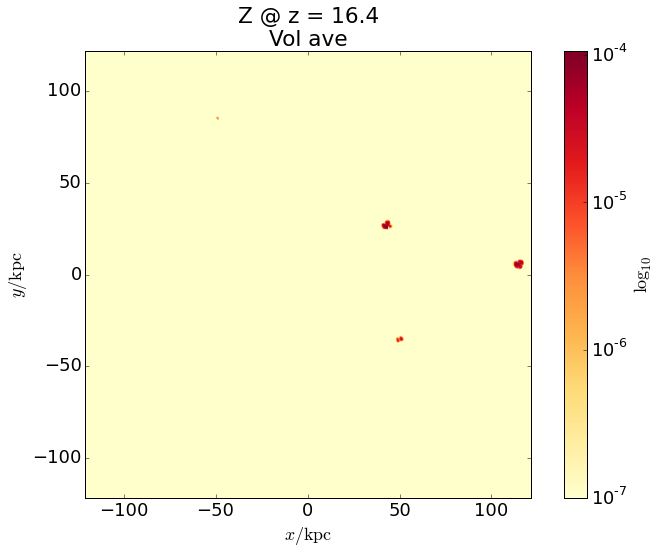

In [24]:
titleStr = "Z @ z = %.1lf" % z + "\nVol ave"
sph.image(s.g,qty="metal",width=boxsizestring,cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


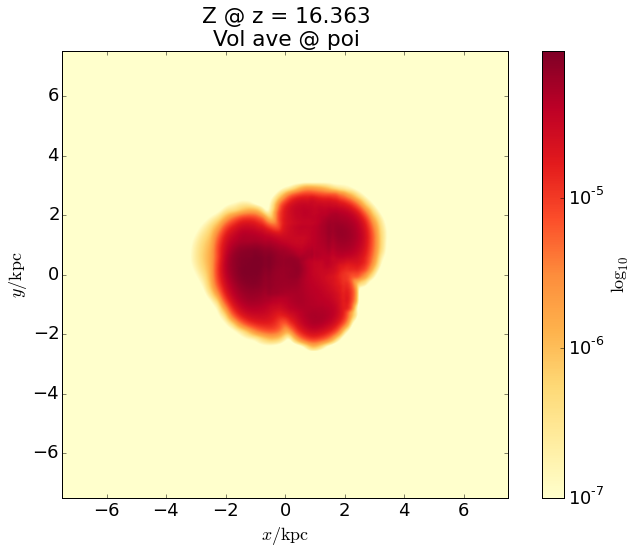

In [27]:
coords= [-114,-5.0,0] # Center the plot 
with pynbody.transformation.translate(s,coords):
    titleStr = "Z @ z = %.3lf" % z + "\nVol ave"
    sph.image(s.g,qty="metal",width="15 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


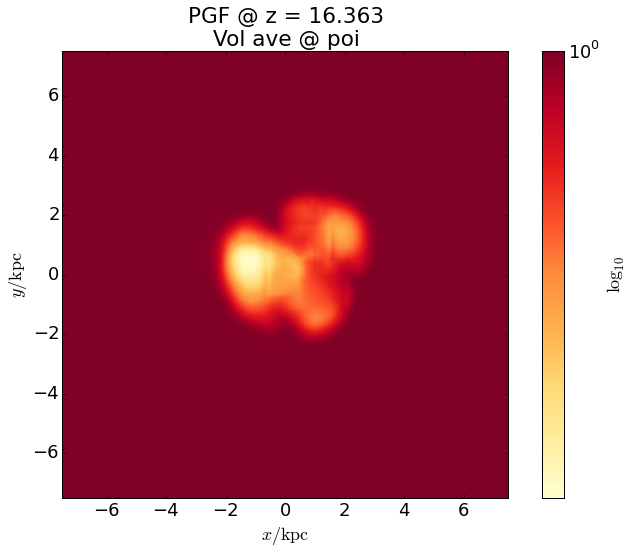

In [30]:
coords= [-114,-5.0,0] # Center the plot 
with pynbody.transformation.translate(s,coords):
    titleStr = "PGF @ z = %.3lf" % z + "\nVol ave"
    sph.image(s.g,qty="pgf",width="15 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


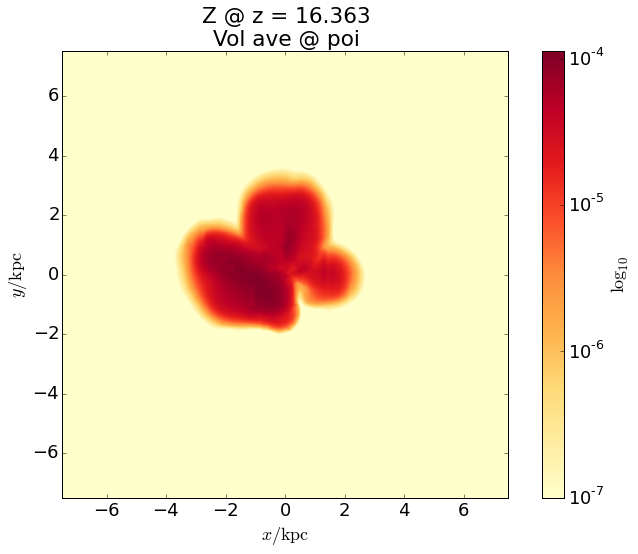

In [31]:
coords= [-43,-26.0,0] # Center the plot
with pynbody.transformation.translate(s,coords):
    titleStr = "Z @ z = %.3lf" % z + "\nVol ave @ poi"
    sph.image(s.g,qty="metal",width="15 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [74]:
# Cut out a cube of the "important data" ... around the area of interest above. 
impData = s[pynbody.filt.Cuboid("30 kpc", "16 kpc","110 kpc","53 kpc", "36 kpc", "120 kpc")]

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


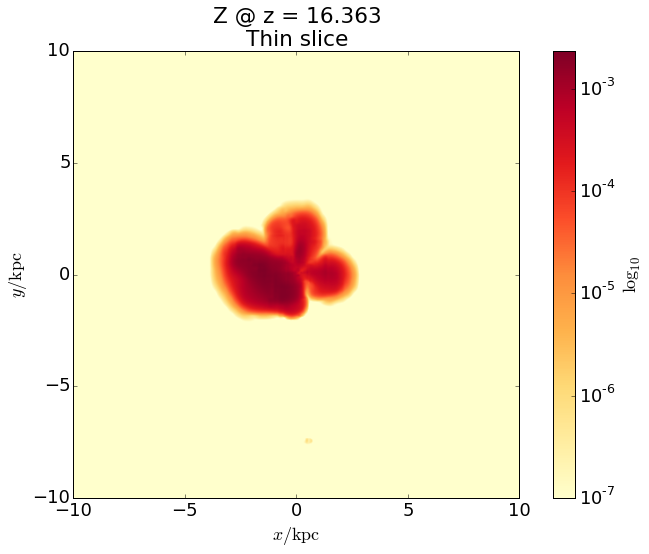

In [75]:
coords= [-43,-26.0,0] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Z @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData.g,qty="metal",width="20 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


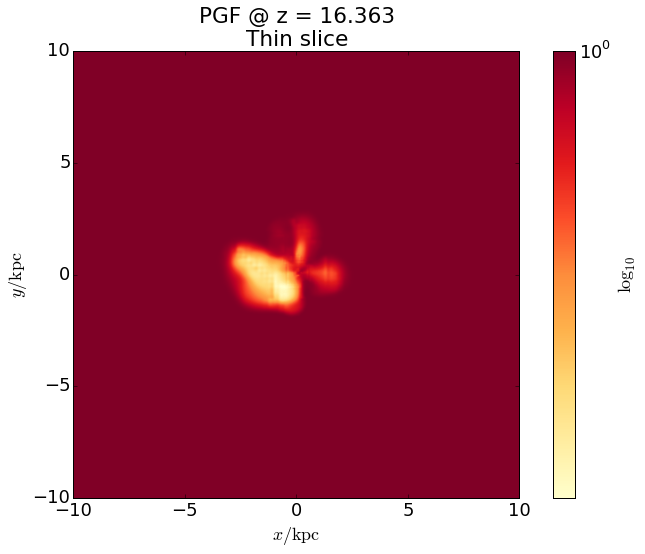

In [76]:
coords= [-43,-26.0,0] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "PGF @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData.g,qty="pgf",width="20 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [80]:
impData2 = s[pynbody.filt.Cuboid("30 kpc", "16 kpc","115 kpc","53 kpc", "36 kpc", "120 kpc")]
impData2.g['pf'] = 1.0-impData2.g['pgf']

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


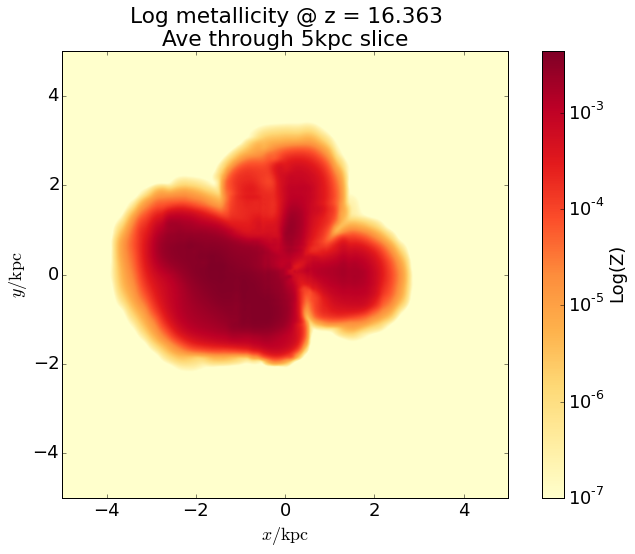

In [129]:
coords= [-43,-26.0,0] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log metallicity @ z = %.3lf" % z + "\nAve through 5kpc slice"
    sph.image(impData2.g,qty="metal",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr,qtytitle="Log(Z)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


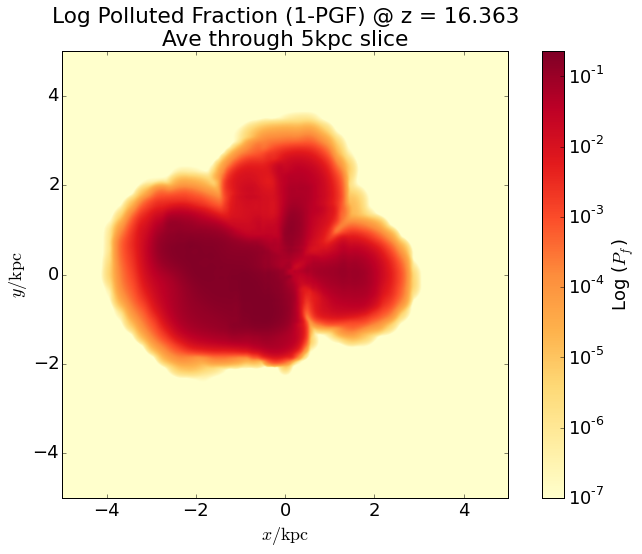

In [140]:
coords= [-43,-26.0,0] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log Polluted Fraction (1-PGF) @ z = %.3lf" % z + "\nAve through 5kpc slice"
    sph.image(impData2.g,qty="pf",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr,qtytitle="Log ($P_f$)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


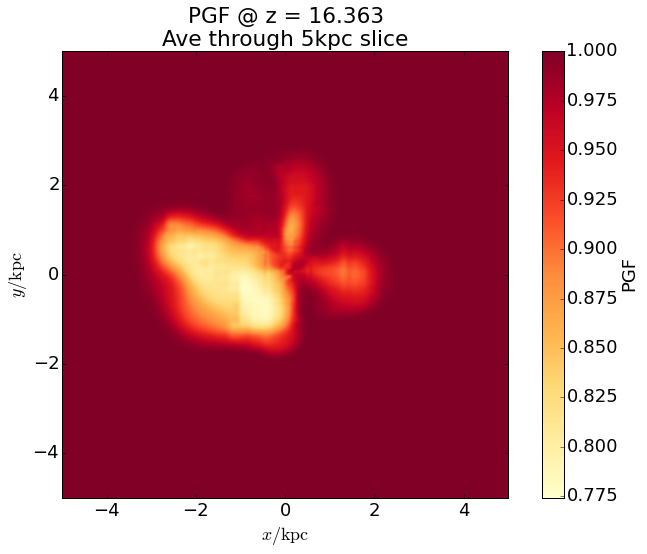

In [141]:
coords= [-43,-26.0,0] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "PGF @ z = %.3lf" % z + "\nAve through 5kpc slice"
    sph.image(impData2.g,qty="pgf",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=False, 
              approximate_fast=False,title=titleStr,qtytitle="PGF"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


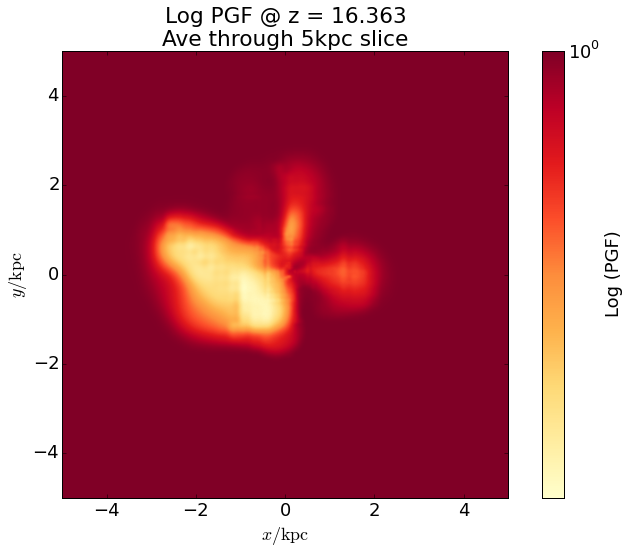

In [137]:
coords= [-43,-26.0,0] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log PGF @ z = %.3lf" % z + "\nAve through 5kpc slice"
    sph.image(impData2.g,qty="pgf",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=0.77,
              approximate_fast=False,title=titleStr,qtytitle="Log (PGF)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


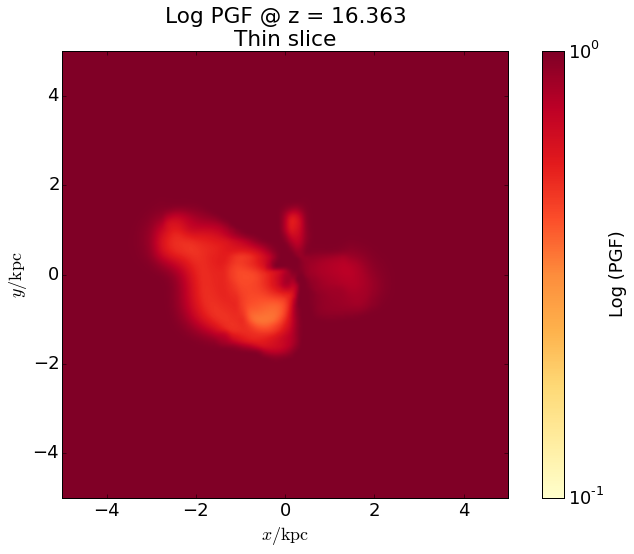

In [136]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log PGF @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="pgf",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, vmin=0.1,
              approximate_fast=False,title=titleStr,qtytitle="Log (PGF)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


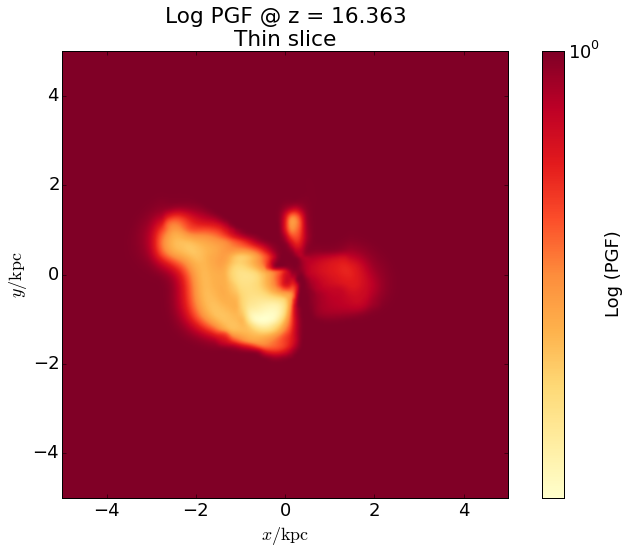

In [142]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log PGF @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="pgf",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, 
              approximate_fast=False,title=titleStr,qtytitle="Log (PGF)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


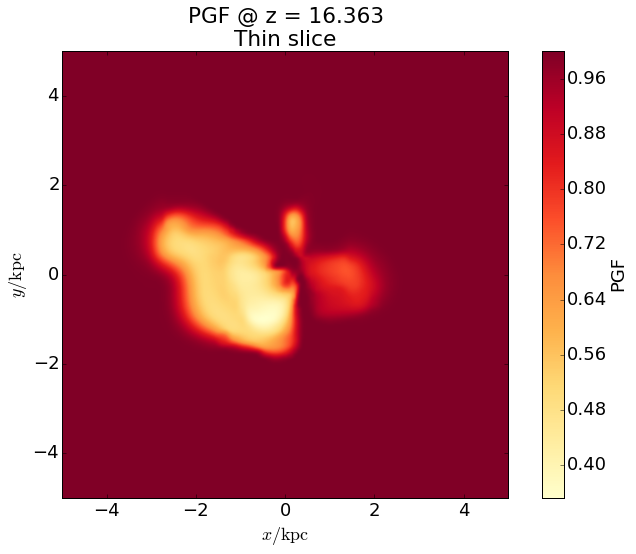

In [143]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "PGF @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="pgf",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=False, 
              approximate_fast=False,title=titleStr,qtytitle="PGF"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


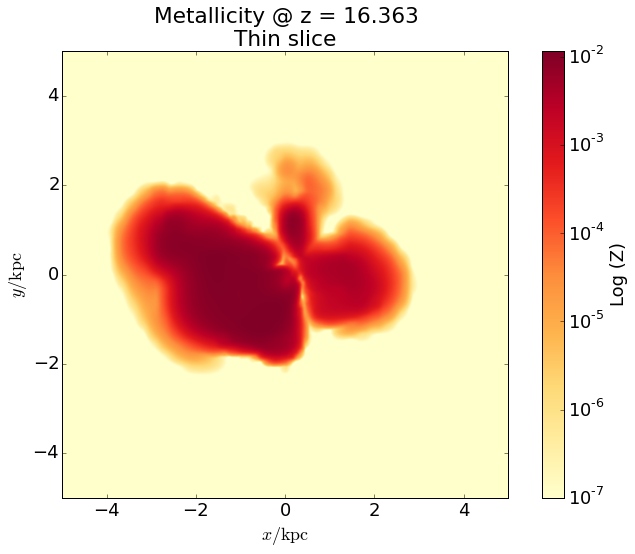

In [144]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Metallicity @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="metal",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr,qtytitle="Log (Z)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


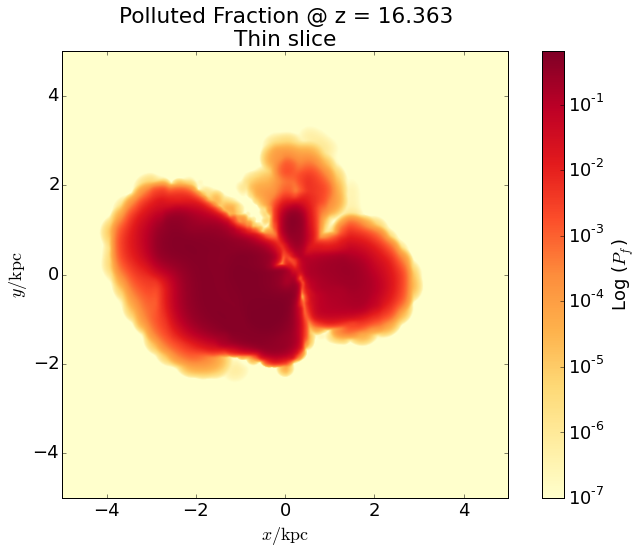

In [145]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Polluted Fraction @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="pf",width="10 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr,qtytitle="Log ($P_f$)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


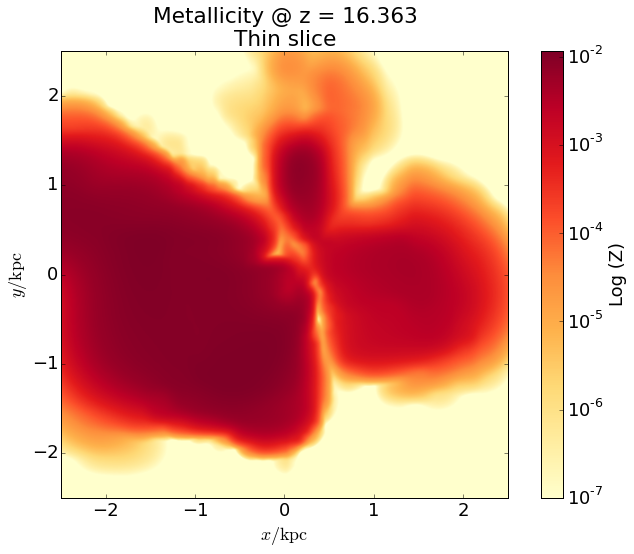

In [146]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Metallicity @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="metal",width="5 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr,qtytitle="Log (Z)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


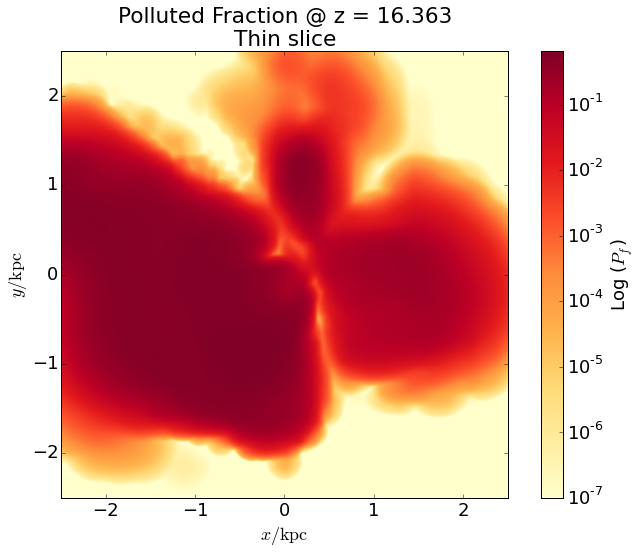

In [147]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Polluted Fraction @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="pf",width="5 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr,qtytitle="Log ($P_f$)"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


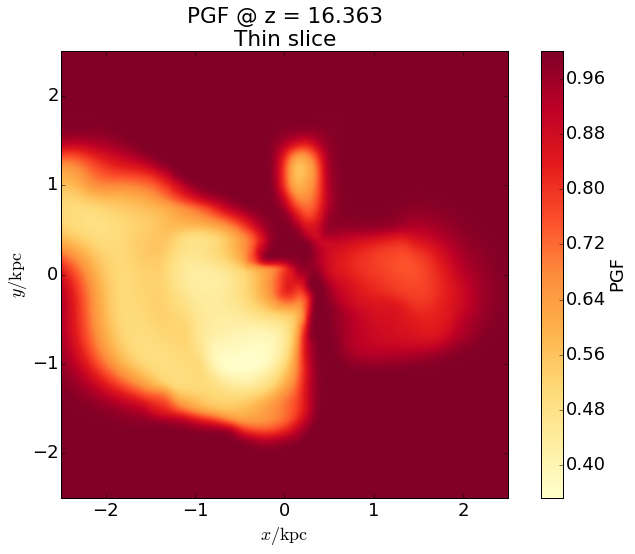

In [148]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "PGF @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="pgf",width="5 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=False, 
              approximate_fast=False,title=titleStr,qtytitle="PGF"); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


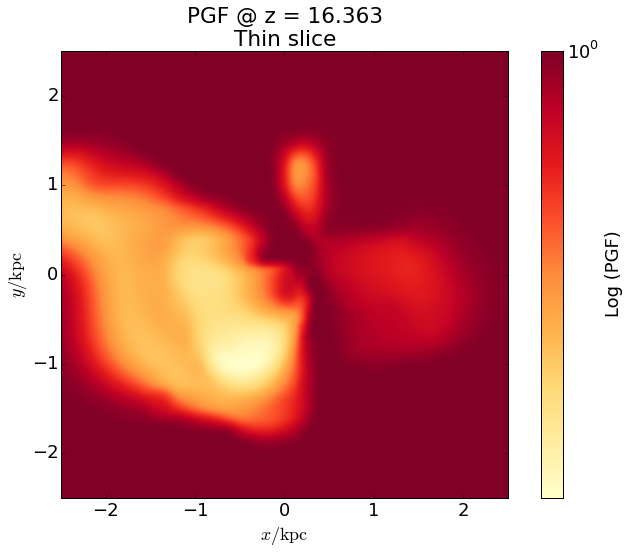

In [149]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "PGF @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="pgf",width="5 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, 
              approximate_fast=False,title=titleStr,qtytitle="Log (PGF)"); #vmin=0.006, vmax=1.0,

In [195]:
impData2.g['metal2'] = impData2.g['metal']
impData2.g['metal2'][impData2.g['metal2']==0.0] = 1e-10
len(impData2.g['metal2'][impData2.g['metal2']==1e-10])

215744

In [198]:
impData2.g['ratio']=(1.0-impData2.g['pgf'])/(impData2.g['metal2'])

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


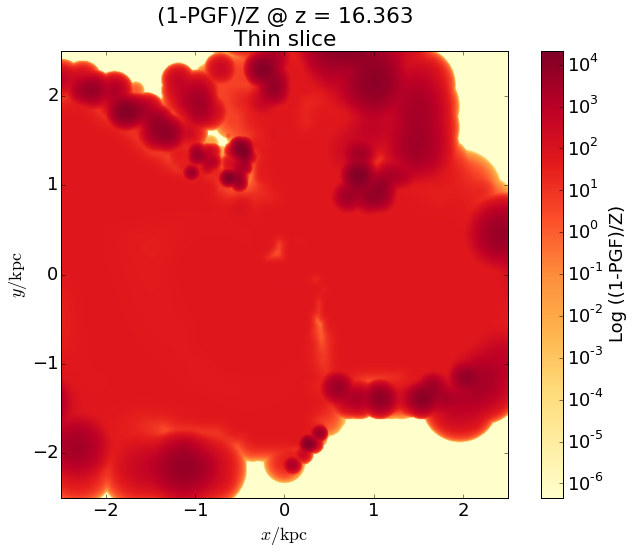

In [199]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "(1-PGF)/Z @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="ratio",width="5 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, 
              approximate_fast=False,title=titleStr,qtytitle="Log ((1-PGF)/Z)"); #vmin=0.006, vmax=1.0,

In [176]:
impData2.g['ratio2']=impData2.g['metal']/(1.0-impData2.g['pgf'])

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


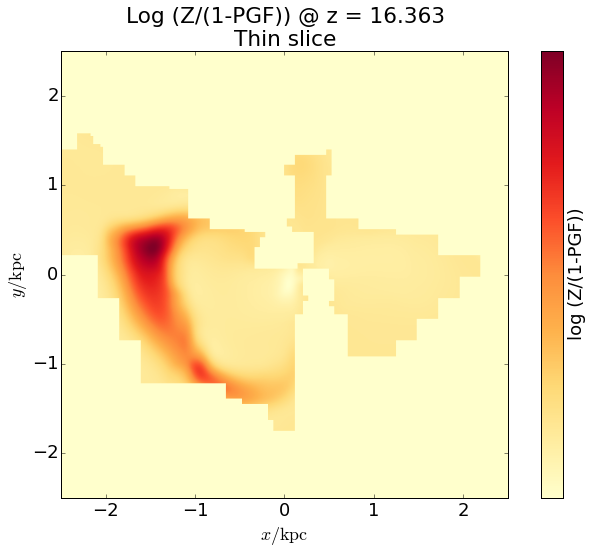

In [184]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log (Z/(1-PGF)) @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="ratio2",width="5 kpc",cmap="YlOrRd", denoise=True ,av_z=False, log=True, qtytitle ="log (Z/(1-PGF))",
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [221]:
pynbody.plot.stars.render(s.s, width=s.properties['boxsize'].in_units('kpc'))

INFO:pynbody.snapshot:Deriving array i_lum_den
INFO:pynbody.snapshot:Deriving array i_mag


KeyError: 'No derivation rule for metals'

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


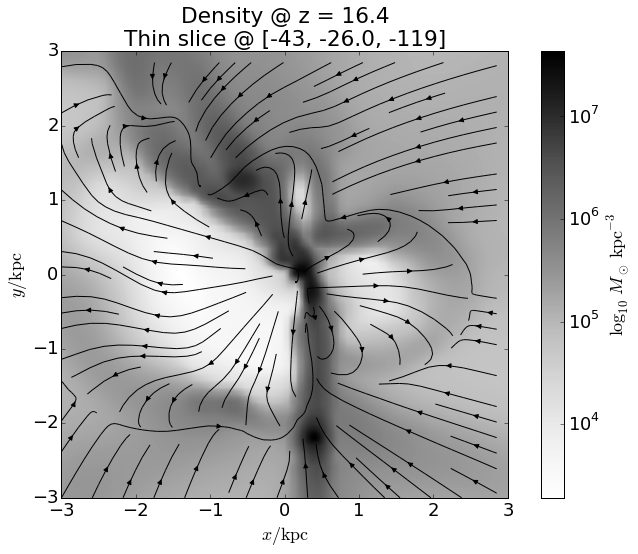

In [213]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData2,coords):
    titleStr = "Density @ z = %.1lf" % z + "\nThin slice @ %s" % str(coords)
    sph.velocity_image(impData2.g, qty="rho", width="6 kpc", cmap = "Greys", mode='stream', #qtytitle="${log_{10} Z}$",
                   density = 1.0, vector_resolution=40, denoise=True ,av_z=False, log=True,
                   show_cbar=True, vector_color='black',title=titleStr)

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


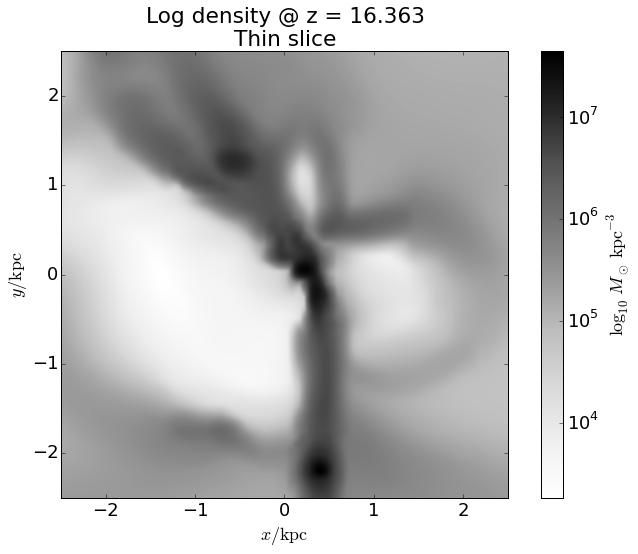

In [206]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log density @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="rho",width="5 kpc",cmap="Greys", denoise=True ,av_z=False, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


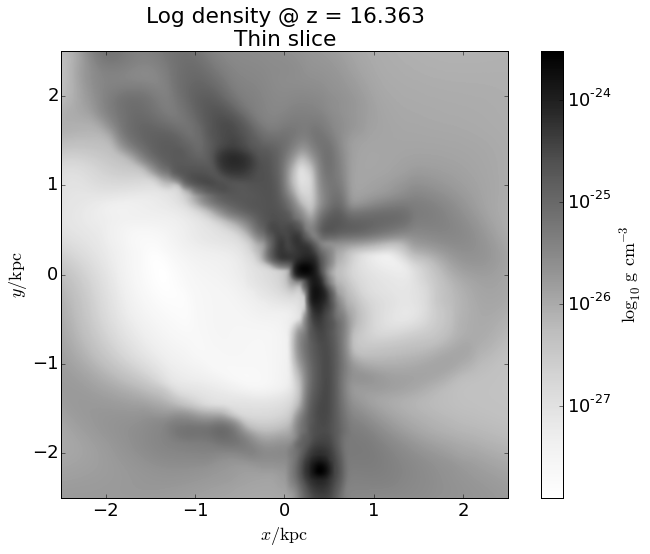

In [205]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log density @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="rho",width="5 kpc",cmap="Greys", units="g cm^-3", denoise=True ,av_z=False, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


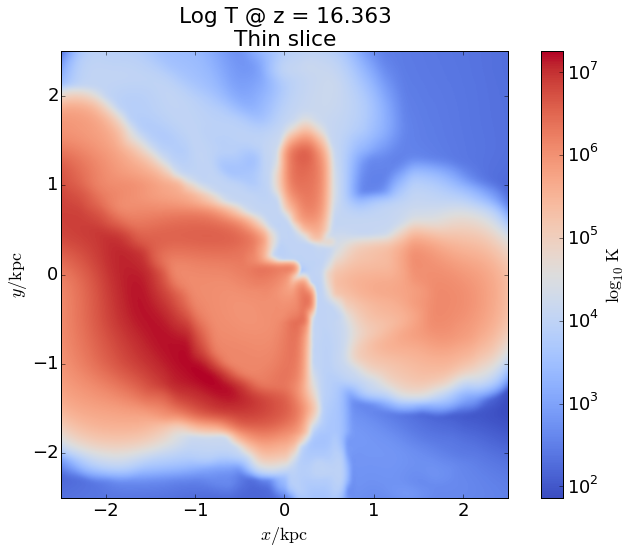

In [203]:
coords= [-43,-26.0,-119] # Center the plot
with pynbody.transformation.translate(impData,coords):
    titleStr = "Log T @ z = %.3lf" % z + "\nThin slice"
    sph.image(impData2.g,qty="temp",width="5 kpc",cmap="coolwarm", denoise=True ,av_z=False, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


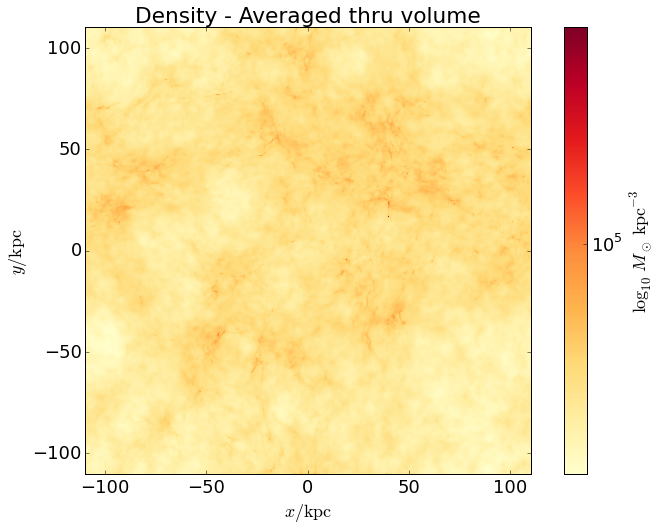

In [74]:
sph.image(s.g,qty="rho",width=boxsizestring,cmap="YlOrRd", denoise=True ,av_z=True,
          approximate_fast=False,title="Density - Averaged thru volume");

In [18]:
# Cut out a cube of the "important data" ... around the area of interest above. 
impData = s[pynbody.filt.Cuboid("4.0 kpc", "-1.6 kpc","-5 kpc","5.3 kpc", "-.3 kpc", "0 kpc")]

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.snapshot:Deriving array mass
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


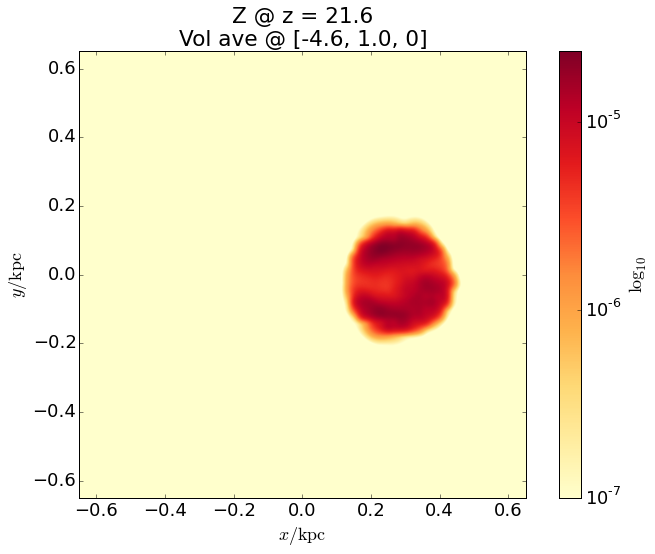

In [45]:
coords= [-4.6,1.0,0] # Center the plot on our cuboid
with pynbody.transformation.translate(impData,coords):
    titleStr = "Z @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="metal",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


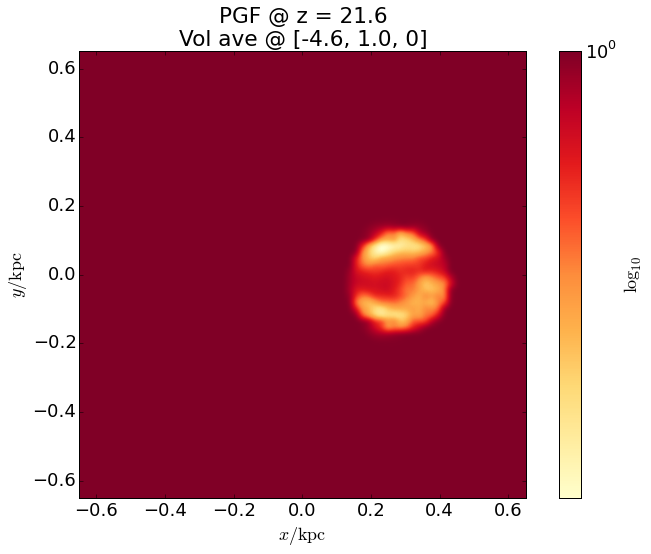

In [46]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="pgf",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [47]:
min(impData.g['pgf']),max(impData.g['pgf'][impData.g['pgf'] < 1.0])

(0.9867112674960099, 0.99999988175986265)

In [48]:
# 'invert' the pgf ... makes for better plotting.
impData.g['oneMpgf'] = 1.0 - impData.g['pgf']

In [49]:
max(impData.g['oneMpgf']),min(impData.g['oneMpgf'][impData.g['oneMpgf'] > 0.0])

(0.013288732503990097, 1.18240137347847e-07)

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


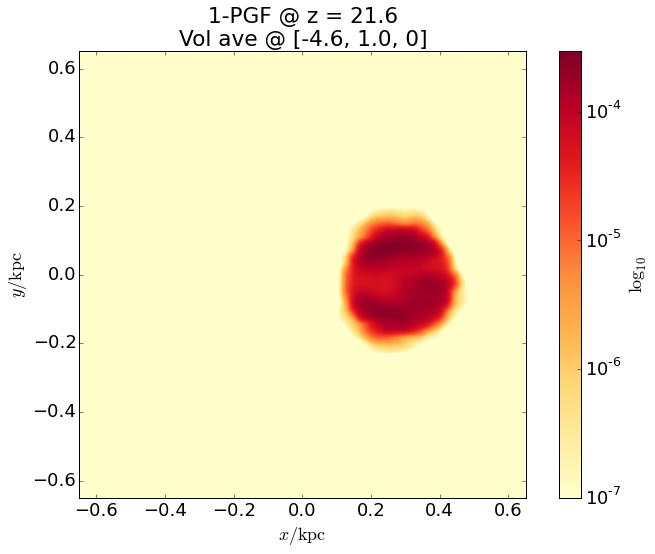

In [50]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "1-PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="oneMpgf",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


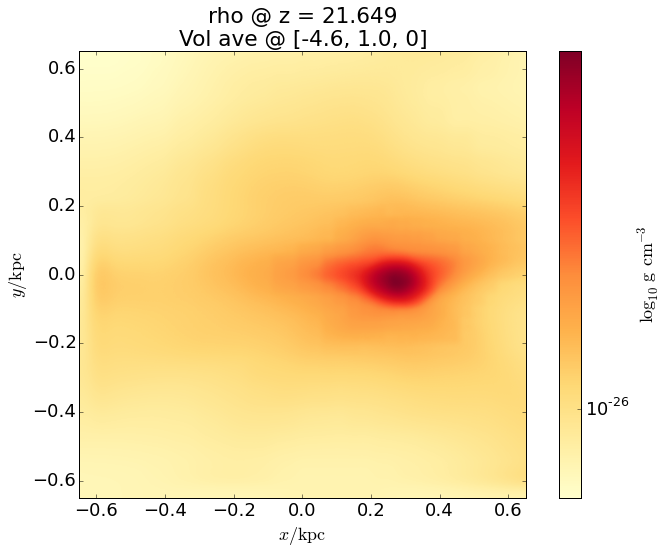

In [22]:
coords= [-4.6,1.0,0] # Center the plot on our cuboid
with pynbody.transformation.translate(impData,coords):
    titleStr = "rho @ z = %.3lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="rho",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              units="g cm^-3",approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [51]:
# Generate a set of points that should all be zero... 
test = impData.g['oneMpgf'] - (12.45144 * impData.g['metal'])
test

SimArray([ 0.,  0.,  0., ...,  0.,  0.,  0.])

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


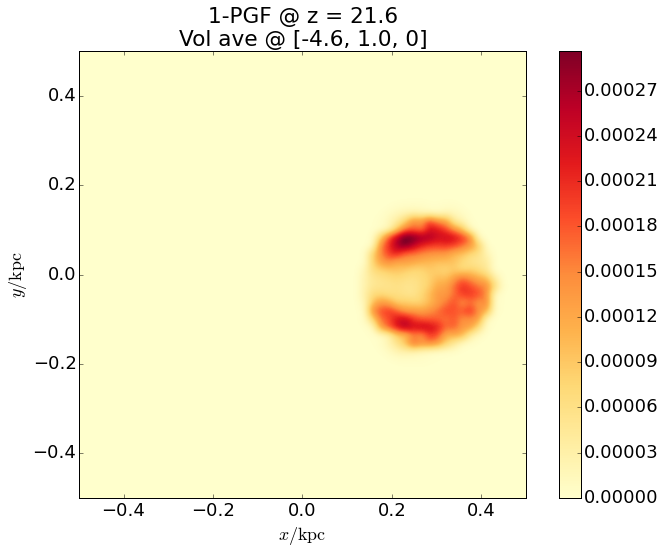

In [56]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "1-PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="oneMpgf",width="1 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=False, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [57]:
diff = impData.g['oneMpgf'] - 12.45144 * impData.g['metal']

In [58]:
len(diff[diff<0.0]),len(diff)

(70, 69305)

# Next

In [16]:
s2 = pynbody.load('output_00022',maxlevel=13)
s2['pos']
s2['pos'] -= 0.5
s2.physical_units();

INFO:pynbody:Loading using backend <class 'pynbody.snapshot.ramses.RamsesSnap'>
INFO:pynbody.snapshot.ramses:Loading hydro files
INFO:pynbody.snapshot.ramses:Done
INFO:pynbody.snapshot.ramses:Loading data from CPU 1
INFO:pynbody.snapshot.ramses:Loading data from CPU 17
INFO:pynbody.snapshot.ramses:Loading data from CPU 33
INFO:pynbody.snapshot.ramses:Loading data from CPU 49
INFO:pynbody.snapshot.ramses:Loading data from CPU 65
INFO:pynbody.snapshot.ramses:Loading data from CPU 81
INFO:pynbody.snapshot.ramses:Loading data from CPU 97
INFO:pynbody.snapshot.ramses:Loading data from CPU 113
INFO:pynbody.snapshot.ramses:Loading data from CPU 2
INFO:pynbody.snapshot.ramses:Loading data from CPU 18
INFO:pynbody.snapshot.ramses:Loading data from CPU 34
INFO:pynbody.snapshot.ramses:Loading data from CPU 50
INFO:pynbody.snapshot.ramses:Loading data from CPU 66
INFO:pynbody.snapshot.ramses:Loading data from CPU 82
INFO:pynbody.snapshot.ramses:Loading data from CPU 98
INFO:pynbody.snapshot.ramses

In [17]:
z2 = 1/s2.properties['a']-1
print "Redshift =",z2
boxsizestring2 = "%.2f" % s2.properties['boxsize'].in_units('kpc')
boxsizestring2 += " kpc"
print boxsizestring2
print s2.properties['a']

Redshift = 17.2465654119
231.14 kpc
0.0548048346319


In [18]:
s2.g['metal'][s2.g['metal']<1e-7] = 0.0
s2.g['pzf'][s2.g['pzf']<1e-7] = 0.0
s2.g['pgf'][s2.g['pgf']>(1.0-1e-7)] = 1.0
s2.s['ppf'][s2.s['ppf']>1.0] = 1.0

(1e-07, 1)

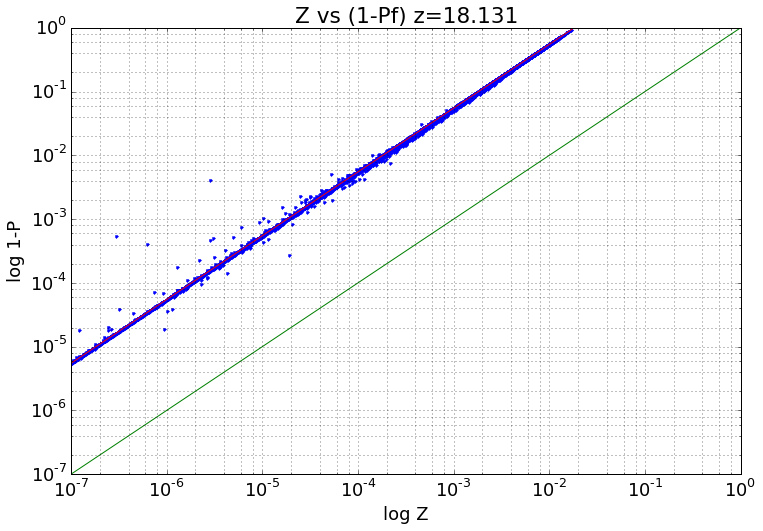

In [19]:
plt.loglog(s2.g['metal'],1.0-s2.g['pgf'],'.',linex,linex,linex,liney)
plt.title("Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.snapshot:Deriving array mass
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


SimArray([[  3.24782959e-14,   3.24782959e-14,   3.24782959e-14, ...,
          3.24782959e-14,   3.24782959e-14,   3.24782959e-14],
       [  3.24782959e-14,   3.24782959e-14,   3.24782959e-14, ...,
          3.24782959e-14,   3.24782959e-14,   3.24782959e-14],
       [  3.24782959e-14,   3.24782959e-14,   3.24782959e-14, ...,
          3.24782959e-14,   3.24782959e-14,   3.24782959e-14],
       ..., 
       [  3.24782959e-14,   3.24782959e-14,   3.24782959e-14, ...,
          3.24782959e-14,   3.24782959e-14,   3.24782959e-14],
       [  3.24782959e-14,   3.24782959e-14,   3.24782959e-14, ...,
          3.24782959e-14,   3.24782959e-14,   3.24782959e-14],
       [  3.24782959e-14,   3.24782959e-14,   3.24782959e-14, ...,
          3.24782959e-14,   3.24782959e-14,   3.24782959e-14]], dtype=float32)

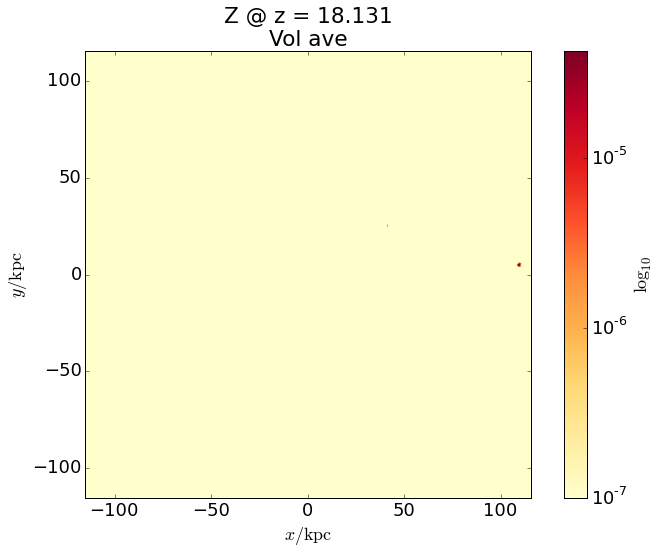

In [20]:
titleStr = "Z @ z = %.3lf" % z + "\nVol ave"
sph.image(s2.g,qty="metal",width=boxsizestring2,cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/array.py:337: RuntimeWarning: invalid value encountered in divide
  return np.ndarray.__div__(self, rhs)
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


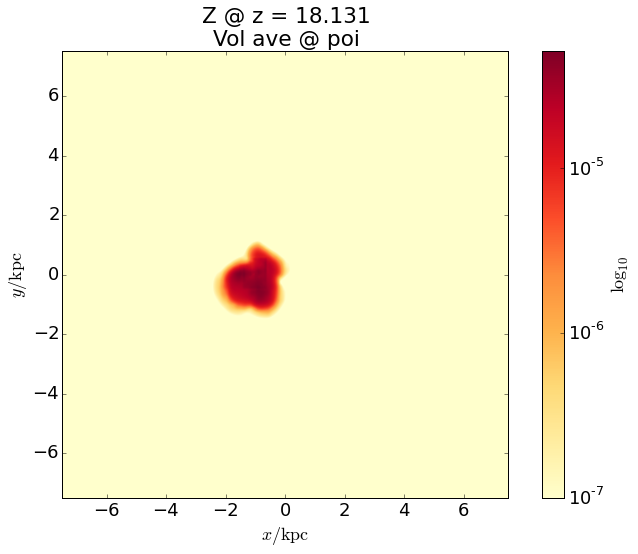

In [24]:
coords= [-110,-5.0,0] # Center the plot on our cuboid
with pynbody.transformation.translate(s2,coords):
    titleStr = "Z @ z = %.3lf" % z + "\nVol ave @ poi"
    sph.image(s2.g,qty="metal",width="15 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


SimArray([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32)

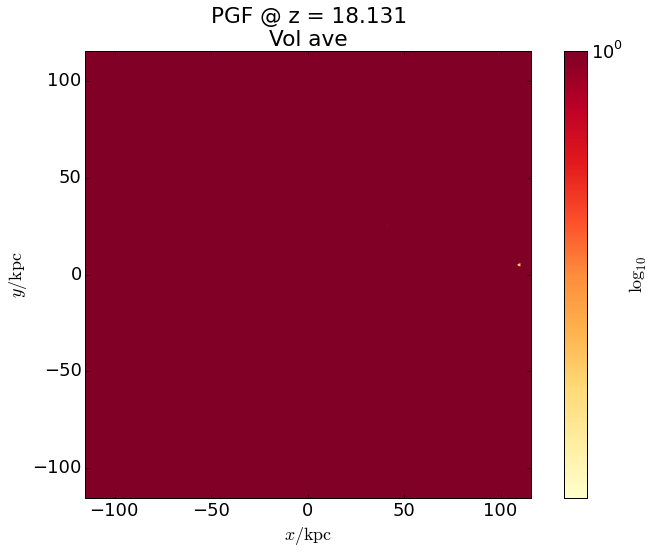

In [21]:
titleStr = "PGF @ z = %.3lf" % z + "\nVol ave"
sph.image(s2.g,qty="pgf",width=boxsizestring2,cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


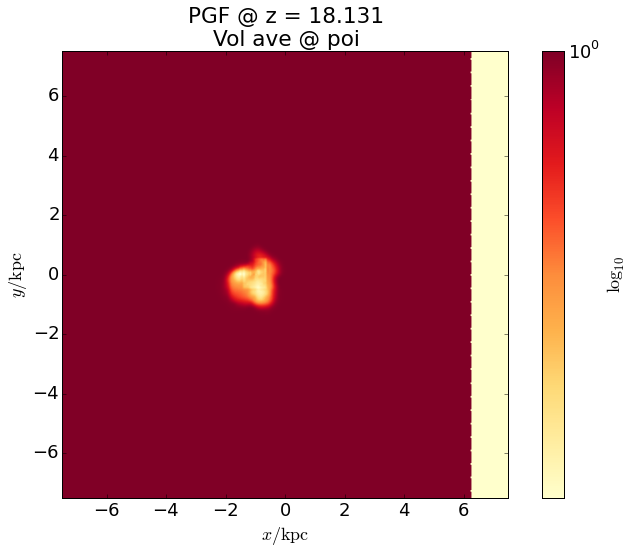

In [25]:
with pynbody.transformation.translate(s2,coords):
    titleStr = "PGF @ z = %.3lf" % z + "\nVol ave @ poi"
    sph.image(s2.g,qty="pgf",width="15 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [ ]:
# Cut out a cube of the "interesting data" ... around the area of interest above. 
impData = s2[pynbody.filt.Cuboid("114 kpc", "3 kpc","-100 kpc","115.5 kpc", "7 kpc", "100 kpc")]